In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [112]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [113]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094563 entries, 0 to 1094562
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1094563 non-null  int64  
 1   kWh       1094563 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.7 MB


In [114]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1094558    0.14
1094559    0.13
1094560    0.13
1094561    0.13
1094562    0.13
Name: kWh, Length: 1094563, dtype: float64

In [115]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1094558    0.14
1094559    0.13
1094560    0.13
1094561    0.13
1094562    0.13
Name: kWh, Length: 1094563, dtype: float64

In [116]:
l=len(conso_data)-1
l

1094562

In [117]:
conso_data['sec']=conso_data['Interval']/1000


In [118]:
conso_data['Wh']=3600000/conso_data['Interval']


In [119]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [120]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094563 entries, 0 to 1094562
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1094563 non-null  int64  
 1   kWh        1094563 non-null  float64
 2   sec        1094563 non-null  float64
 3   Wh         1094563 non-null  float64
 4   cumul(ms)  1094563 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 MB


In [121]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1094558,26447,0.14,26.447,136.121299,25200432830
1094559,27740,0.13,27.740,129.776496,25200460570
1094560,27681,0.13,27.681,130.053105,25200488251
1094561,27687,0.13,27.687,130.024921,25200515938
1094562,27841,0.13,27.841,129.305700,25200543779


In [122]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

25200543779000

In [123]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 37, 10, 2832)

In [124]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [125]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [126]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [127]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:37:31.936832,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:37:53.794832,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:38:15.795832,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:38:37.723832,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:38:59.614832,21/08/23
...,...,...,...,...,...,...,...
1094558,26447,0.14,26.447,136.121299,25200432830,2024-06-08 10:44:22.832832,08/06/24
1094559,27740,0.13,27.740,129.776496,25200460570,2024-06-08 10:44:50.572832,08/06/24
1094560,27681,0.13,27.681,130.053105,25200488251,2024-06-08 10:45:18.253832,08/06/24
1094561,27687,0.13,27.687,130.024921,25200515938,2024-06-08 10:45:45.940832,08/06/24


In [128]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('08/06/24', 6, 2024)

In [129]:
here = now.strftime('%H:%M:%S')
here

'10:46:38'

In [130]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [131]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
1093333,36391,0.10,36.391,98.925559,25161796679,2024-06-08 00:00:26.681832,08/06/24
1093334,35707,0.10,35.707,100.820567,25161832386,2024-06-08 00:01:02.388832,08/06/24
1093335,33808,0.11,33.808,106.483673,25161866194,2024-06-08 00:01:36.196832,08/06/24
1093336,34792,0.10,34.792,103.472063,25161900986,2024-06-08 00:02:10.988832,08/06/24
1093337,35614,0.10,35.614,101.083843,25161936600,2024-06-08 00:02:46.602832,08/06/24
...,...,...,...,...,...,...,...
1094558,26447,0.14,26.447,136.121299,25200432830,2024-06-08 10:44:22.832832,08/06/24
1094559,27740,0.13,27.740,129.776496,25200460570,2024-06-08 10:44:50.572832,08/06/24
1094560,27681,0.13,27.681,130.053105,25200488251,2024-06-08 10:45:18.253832,08/06/24
1094561,27687,0.13,27.687,130.024921,25200515938,2024-06-08 10:45:45.940832,08/06/24


In [132]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [133]:
data = list(df_grp['kWh'])
print(data)


[0.902, 3.699, 4.217, 3.699, 4.214, 4.623, 3.481, 3.397, 3.528, 3.683, 3.846, 3.714, 4.257, 3.861, 3.415, 3.632, 3.325, 3.453, 4.237, 4.019, 4.062, 3.917, 3.448, 4.445, 3.7, 3.817, 4.422, 4.66, 3.719, 3.224, 3.173, 4.056, 3.623, 3.187, 3.79, 4.173, 3.744, 3.557, 4.818, 4.171, 4.534, 3.775, 3.377, 4.319, 3.881, 3.884, 3.428, 4.081, 3.648, 3.397, 4.11, 3.403, 3.894, 3.825, 3.649, 3.744, 4.244, 3.285, 3.886, 2.952, 2.056, 2.041, 2.484, 4.085, 3.741, 4.325, 3.639, 3.892, 3.746, 3.967, 3.926, 4.145, 3.664, 3.174, 3.756, 3.539, 3.597, 3.703, 3.688, 3.228, 3.909, 3.266, 3.748, 3.588, 4.104, 3.671, 3.26, 3.827, 4.117, 4.335, 4.09, 4.0, 4.211, 3.744, 3.932, 3.878, 3.909, 3.763, 4.024, 4.34, 3.877, 3.532, 3.669, 3.66, 3.339, 3.857, 3.985, 4.12, 3.464, 4.179, 3.606, 4.134, 4.486, 3.695, 3.408, 3.593, 4.205, 3.635, 4.08, 3.984, 3.753, 3.583, 5.146, 3.692, 3.766, 4.297, 4.083, 4.786, 4.396, 3.93, 3.817, 4.379, 4.616, 4.249, 4.778, 4.34, 3.66, 4.244, 3.685, 3.604, 3.528, 3.977, 3.629, 3.789, 3.591, 

In [134]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [135]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [136]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [137]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.313369
dtype: float64

In [138]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.73571
dtype: float64

In [139]:
last=df_grp.iloc[-1]['kWh']
last

1.23

<Axes: xlabel='heure'>

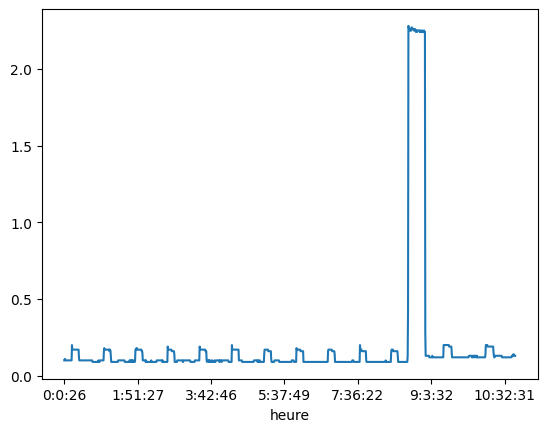

In [140]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [141]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:26',
              days  kWh
  heure                
  0:0:26  08/06/24  0.1),
 ('0:1:2',
             days  kWh
  heure               
  0:1:2  08/06/24  0.1),
 ('0:1:36',
              days   kWh
  heure                 
  0:1:36  08/06/24  0.11),
 ('0:2:10',
              days  kWh
  heure                
  0:2:10  08/06/24  0.1),
 ('0:2:46',
              days  kWh
  heure                
  0:2:46  08/06/24  0.1),
 ('0:3:22',
              days  kWh
  heure                
  0:3:22  08/06/24  0.1),
 ('0:3:57',
              days  kWh
  heure                
  0:3:57  08/06/24  0.1),
 ('0:4:33',
              days  kWh
  heure                
  0:4:33  08/06/24  0.1),
 ('0:5:8',
             days  kWh
  heure               
  0:5:8  08/06/24  0.1),
 ('0:5:44',
              days  kWh
  heure                
  0:5:44  08/06/24  0.1),
 ('0:6:20',
              days  kWh
  heure                
  0:6:20  08/06/24  0.1),
 ('0:6:56',
              days  kWh
  heure                

In [142]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:26',
  heure
  0:0:26    0.1
  Name: kWh, dtype: float64),
 ('0:1:2',
  heure
  0:1:2    0.1
  Name: kWh, dtype: float64),
 ('0:1:36',
  heure
  0:1:36    0.11
  Name: kWh, dtype: float64),
 ('0:2:10',
  heure
  0:2:10    0.1
  Name: kWh, dtype: float64),
 ('0:2:46',
  heure
  0:2:46    0.1
  Name: kWh, dtype: float64),
 ('0:3:22',
  heure
  0:3:22    0.1
  Name: kWh, dtype: float64),
 ('0:3:57',
  heure
  0:3:57    0.1
  Name: kWh, dtype: float64),
 ('0:4:33',
  heure
  0:4:33    0.1
  Name: kWh, dtype: float64),
 ('0:5:8',
  heure
  0:5:8    0.1
  Name: kWh, dtype: float64),
 ('0:5:44',
  heure
  0:5:44    0.1
  Name: kWh, dtype: float64),
 ('0:6:20',
  heure
  0:6:20    0.1
  Name: kWh, dtype: float64),
 ('0:6:56',
  heure
  0:6:56    0.1
  Name: kWh, dtype: float64),
 ('0:7:31',
  heure
  0:7:31    0.1
  Name: kWh, dtype: float64),
 ('0:8:7',
  heure
  0:8:7    0.1
  Name: kWh, dtype: float64),
 ('0:8:43',
  heure
  0:8:43    0.1
  Name: kWh, dtype: float64),
 ('0:9:19',
  h

In [143]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [144]:
df.iloc[0].dates

Timestamp('2024-06-08 00:00:26.681832')

In [145]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [146]:
df.dates.dt.time

heure
0:0:26      00:00:26.681832
0:1:2       00:01:02.388832
0:1:36      00:01:36.196832
0:2:10      00:02:10.988832
0:2:46      00:02:46.602832
                 ...       
10:44:22    10:44:22.832832
10:44:50    10:44:50.572832
10:45:18    10:45:18.253832
10:45:45    10:45:45.940832
10:46:13    10:46:13.781832
Name: dates, Length: 1230, dtype: object

In [147]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-08 00:00:26.681832	2024-06-08 09:03:03.572832	9h 2m 36s 	1000
2024-06-08 09:03:03.572832	2024-06-08 10:46:13.781832	1h 43m 10s 	230


In [148]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:46:38', 1.23, 1230)

In [149]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [150]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 21/08/23 to 08/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     293 non-null    float64
dtypes: float64(1)
memory usage: 4.6+ KB


In [151]:
df_grp.to_csv('df_grp.csv')

In [152]:
df_grp.tail(7)

,kWh
days,
02/06/24,4.448
03/06/24,3.379
04/06/24,3.278
05/06/24,3.523
06/06/24,3.170
07/06/24,2.941
08/06/24,1.230


Text(0.5, 1.0, 'Week conso')

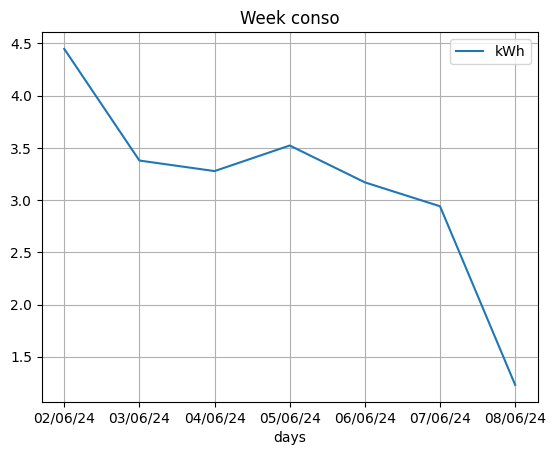

In [153]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')

In [154]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [155]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


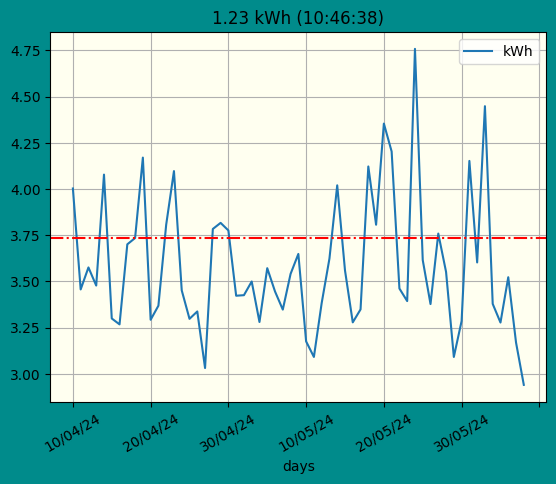

In [156]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")
# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [157]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
02/06/24,4.448
03/06/24,3.379
04/06/24,3.278
05/06/24,3.523
06/06/24,3.170
07/06/24,2.941
08/06/24,1.230


In [158]:
df_grp.mean()

kWh    3.73571
dtype: float64

In [159]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 1093333 to 1094562
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1230 non-null   int64         
 1   kWh        1230 non-null   float64       
 2   sec        1230 non-null   float64       
 3   Wh         1230 non-null   float64       
 4   cumul(ms)  1230 non-null   int64         
 5   dates      1230 non-null   datetime64[ns]
 6   days       1230 non-null   object        
 7   heure      1230 non-null   object        
 8   hours      1230 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 96.1+ KB


In [160]:
day

'08/06/24'

In [161]:

# group conso by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1093333    00  0.10
  1093334    00  0.10
  1093335    00  0.11
  1093336    00  0.10
  1093337    00  0.10
  ...       ...   ...
  1093435    00  0.10
  1093436    00  0.10
  1093437    00  0.10
  1093438    00  0.10
  1093439    00  0.10
  
  [107 rows x 2 columns]),
 ('01',
          hours   kWh
  1093440    01  0.10
  1093441    01  0.16
  1093442    01  0.18
  1093443    01  0.17
  1093444    01  0.17
  ...       ...   ...
  1093548    01  0.10
  1093549    01  0.10
  1093550    01  0.10
  1093551    01  0.10
  1093552    01  0.10
  
  [113 rows x 2 columns]),
 ('02',
          hours   kWh
  1093553    02  0.10
  1093554    02  0.10
  1093555    02  0.09
  1093556    02  0.10
  1093557    02  0.09
  ...       ...   ...
  1093651    02  0.10
  1093652    02  0.10
  1093653    02  0.10
  1093654    02  0.10
  1093655    02  0.10
  
  [103 rows x 2 columns]),
 ('03',
          hours   kWh
  1093656    03  0.09
  1093657    03  0.09
  1093658    03  0.1

In [162]:
groupedbyhour.count()

,kWh
hours,
00,107
01,113
02,103
03,105
04,104
05,106
06,106
07,100
08,149


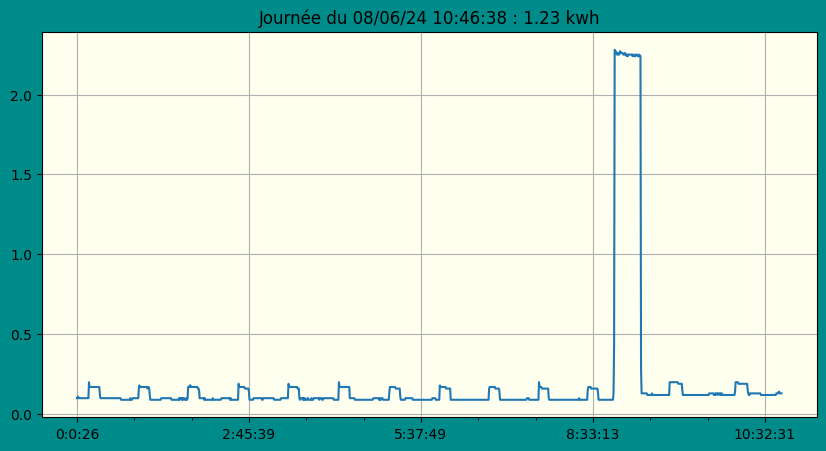

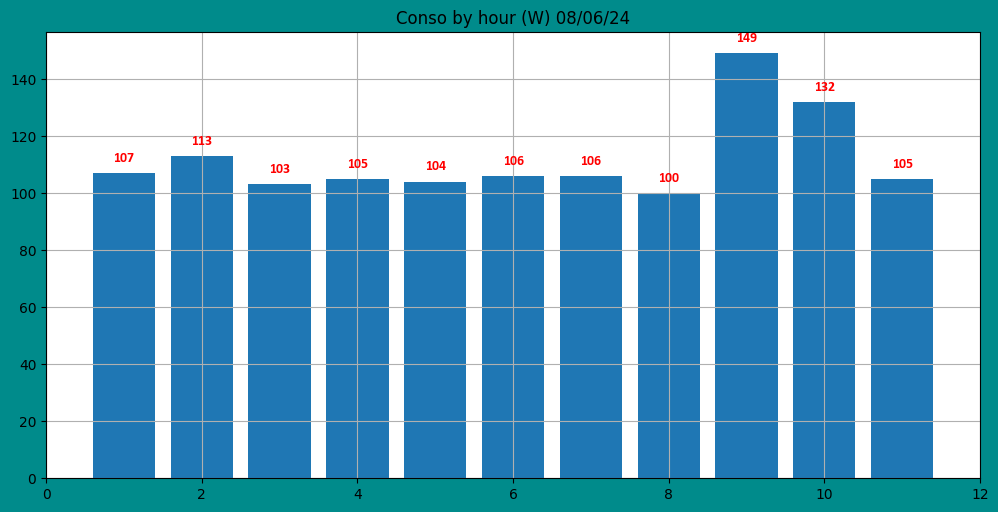

In [163]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [164]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

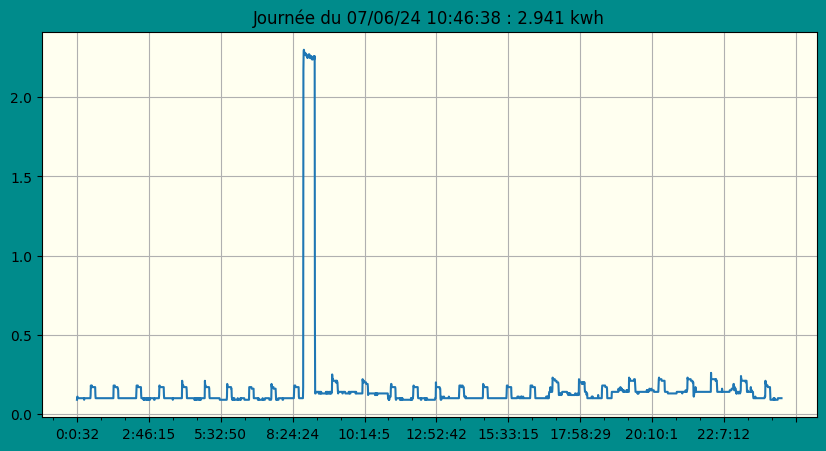

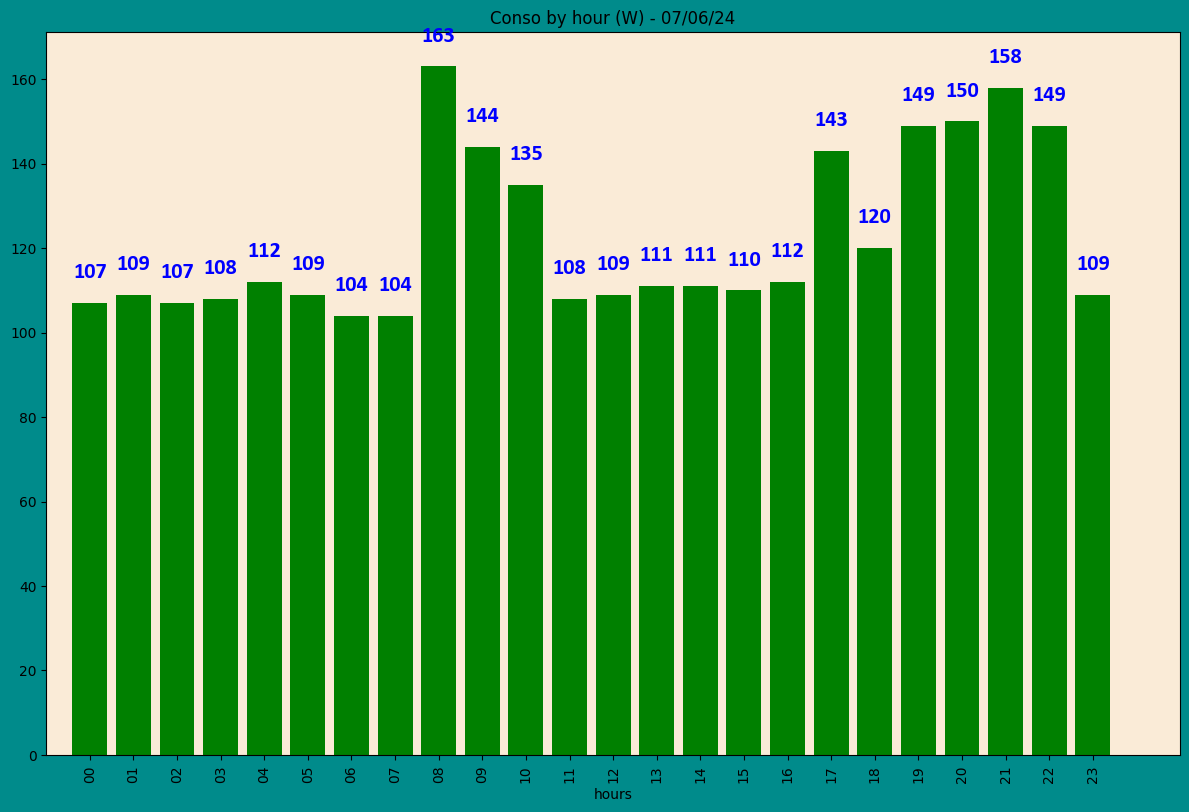

In [165]:
# plot any day
day = '07/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)